In [1]:
import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbPerfectCode import FiveQbPerfectCodeCircuit
from functions import *

Get IONQ results

In [2]:
experiments = {
    '5qb_stabilizer_T1_all_meas' : {'delay' : 'no'},
    '5qb_stabilizer_T1_delay1ms' : {'delay' : '1ms'},
    '5qb_stabilizer_T1_delay2ms' : {'delay' : '2ms'},
    '5qb_stabilizer_T1_delay10ms' : {'delay' : '10ms'},
    '5qb_stabilizer_T1_delay100ms' : {'delay' : '100ms'},
    '5qb_stabilizer_T1_delay10s' : {'delay' : '10s'},
}

In [3]:
states = get_possible_states(5)
valid_states = [s for s in states if sum([int(i) for i in s]) % 2 == 0]
alpha = generate_uniform_distribution(5, valid_states)

In [4]:
for name, exp in experiments.items():
    json_file = name + '.json'
    
    results = extract_results_json_IONQ(json_file, type='percentage')[0]
    exp["results"] = results

    tvd = calculate_tvd(results, alpha, percentage=True)
    exp["tvd"] = tvd
    print(f"{round(tvd*100,2)}%")

    exp["snr"] = calculate_snr(results, valid_states)



6.2%
12.73%
8.19%
8.95%
10.55%
5.88%


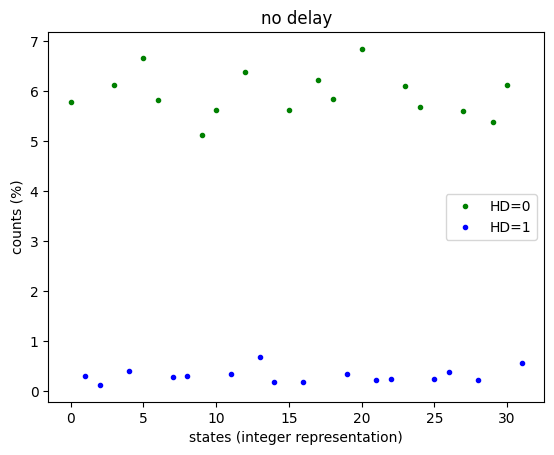

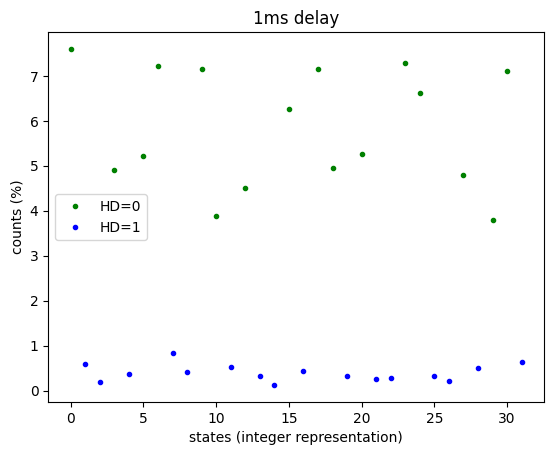

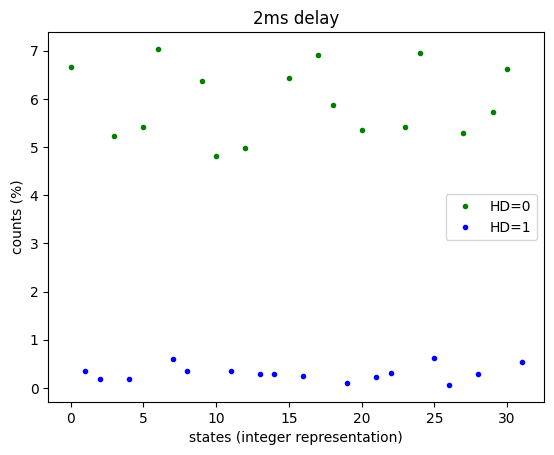

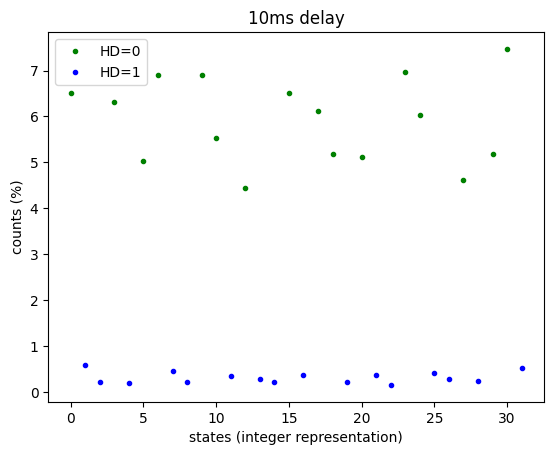

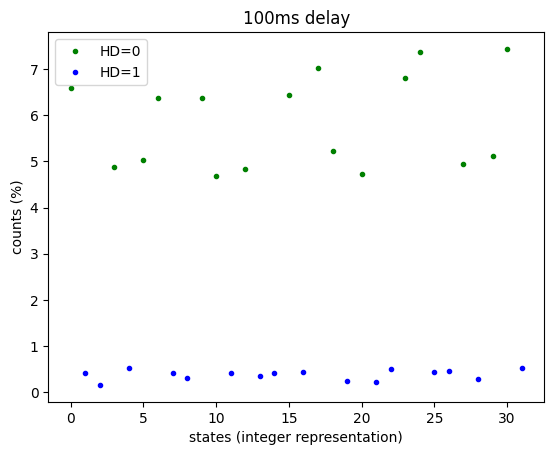

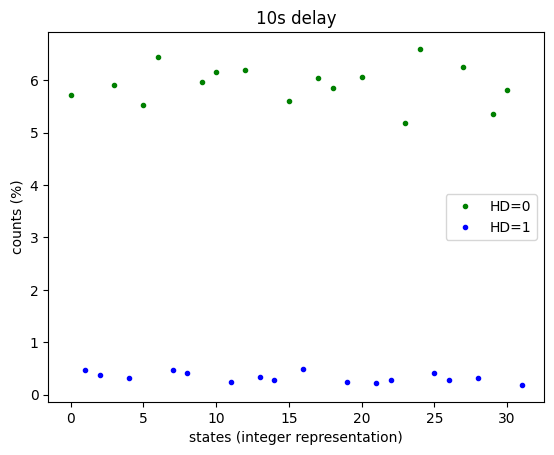

In [5]:
for name, exp in experiments.items():
    plot_results_hamming_distance(exp["results"], 5, valid_states, title=f"{exp["delay"]} delay",
                                  integer_representation=True)

test K-S: 0.959 %


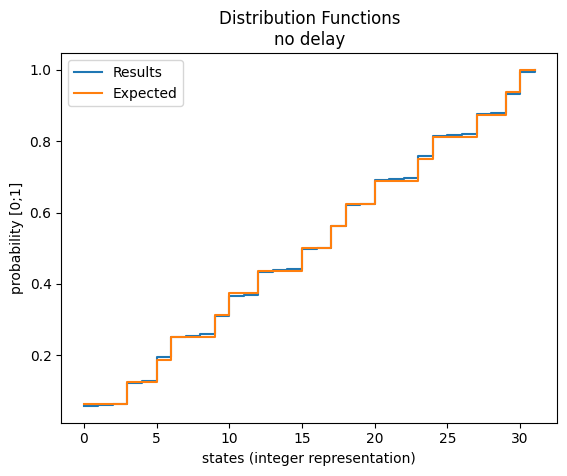

test K-S: 3.272 %


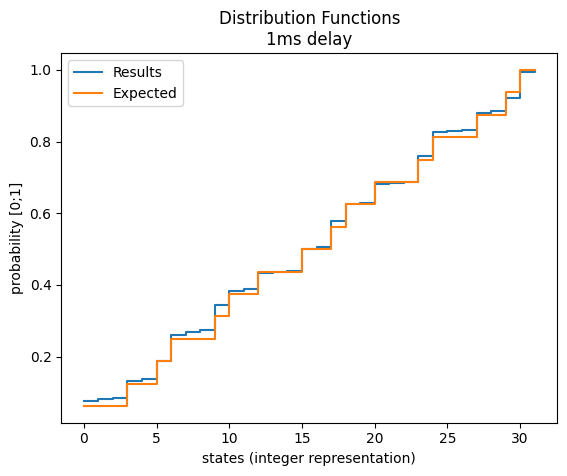

test K-S: 1.255 %


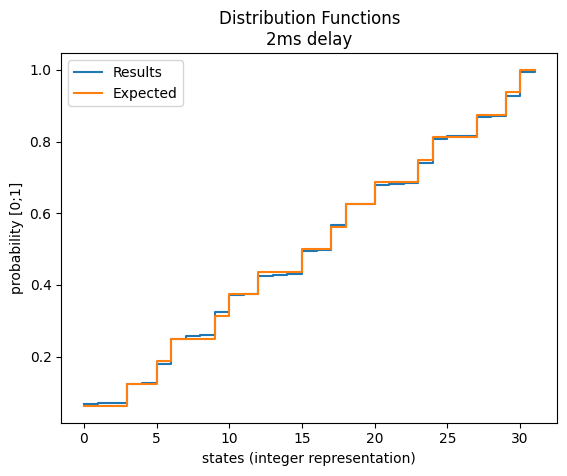

test K-S: 2.104 %


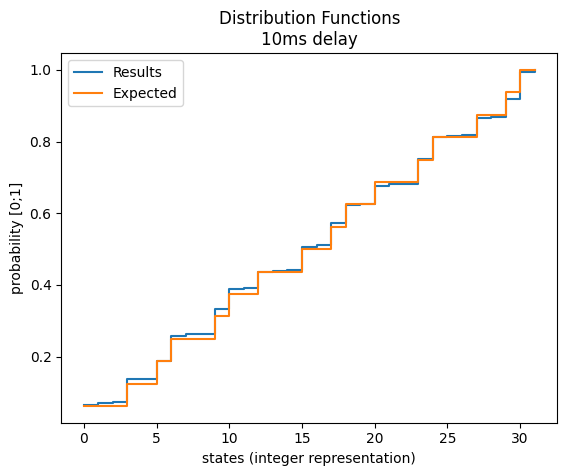

test K-S: 2.886 %


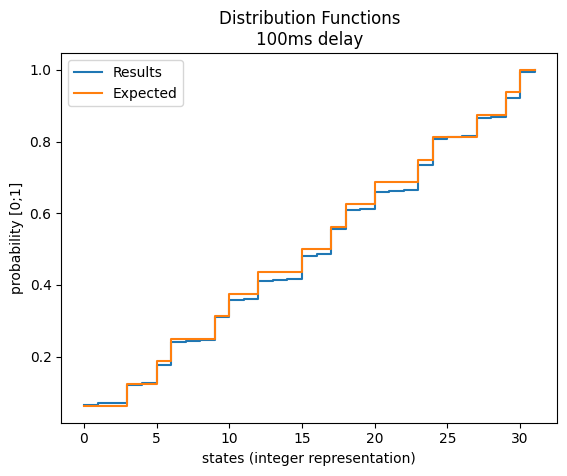

test K-S: 1.153 %


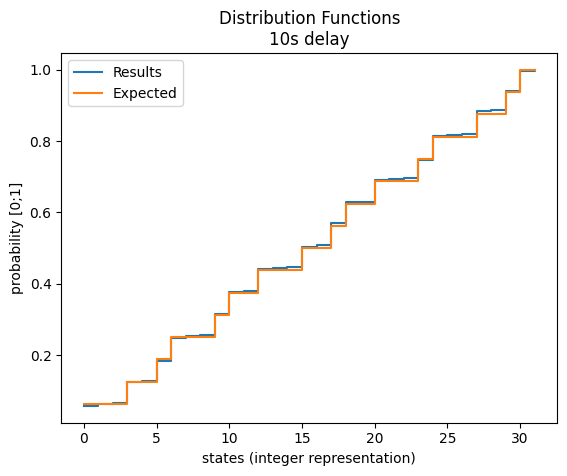

In [6]:
for name, exp in experiments.items():
    print('test K-S:', round(calculate_test_ks(exp["results"], alpha, percentage=True)*100, 3), '%')
    plot_distribution_functions(exp["results"], alpha, percentage=True, title=f"Distribution Functions\n{exp["delay"]} delay", style='step')
    # plot_results_hamming_distance(exp["results"], 5, valid_states, title=f"{exp["delay"]} delay")